In [1]:
from pyfile import eval, eq
from discopy.quantum.zx import Spider, Id
from spiders import W_old, W, Z, Swap, H, CZ, FSwap, X, ZBox

import numpy as np
pi = np.pi

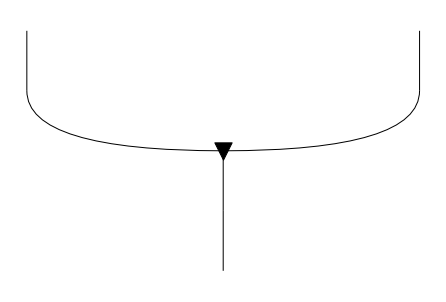

In [2]:
W_old(2, False).draw()

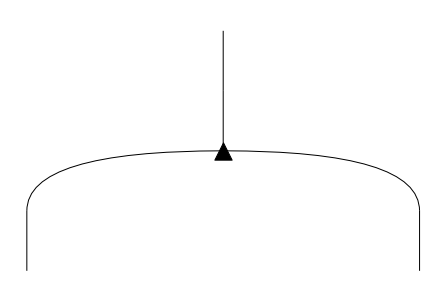

(2, 1)

In [3]:
cw = W_old(2, False)
w = cw.dagger()
w.draw()
len(cw.dom), len(cw.cod)

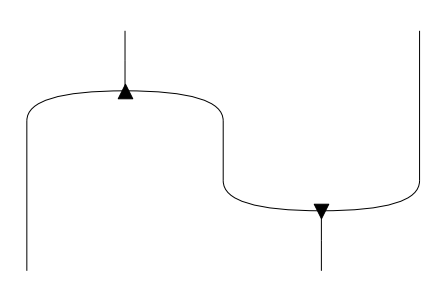

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 1.]])

In [4]:
z = w @ Id(1) >> Id(1) @ cw
z.draw()
eval(z).astype(float)

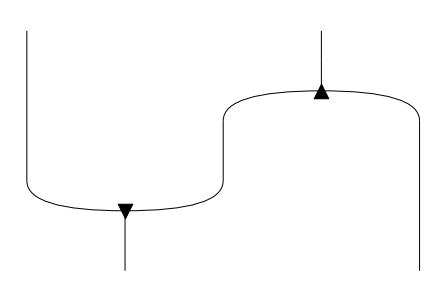

array([[1., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [5]:
zz = Id(1) @ w >> cw @ Id(1)
zz.draw()
eval(zz).astype(float)

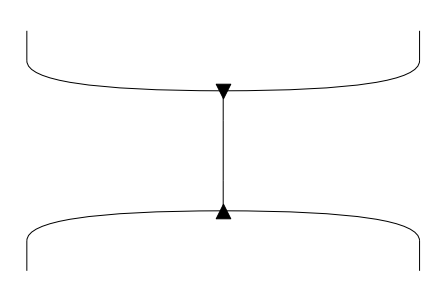

array([[1., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 0.]])

In [6]:
z2 = cw >> w
z2.draw()
eval(z2).astype(float)

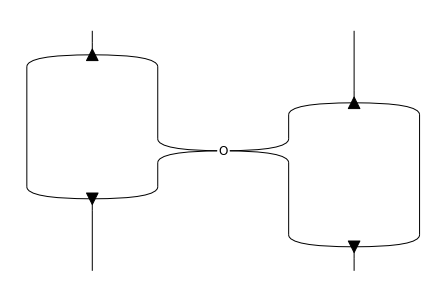

<ipython-input-7-eecfced79642>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(z22).astype(float)


array([[0.70711, 0.     , 0.     , 0.     ],
       [0.     , 0.70711, 0.70711, 0.     ],
       [0.     , 0.70711, 0.70711, 0.     ],
       [0.     , 0.     , 0.     , 0.     ]])

In [7]:
z22 = w @ w >> Id(1) @ FSwap @ Id(1) >> cw @ cw
z22.draw()
eval(z22).astype(float)

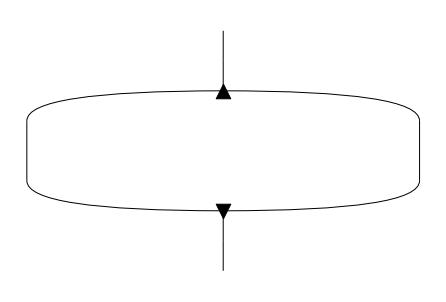

array([[1., 0.],
       [0., 2.]])

In [8]:
d = W_old() >> W_old().dagger()
d.draw()
eval(d)

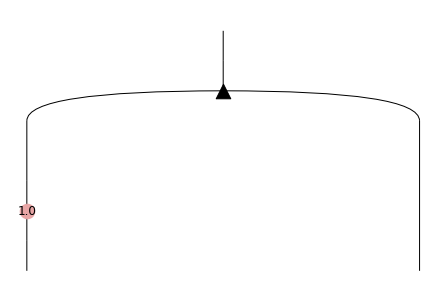

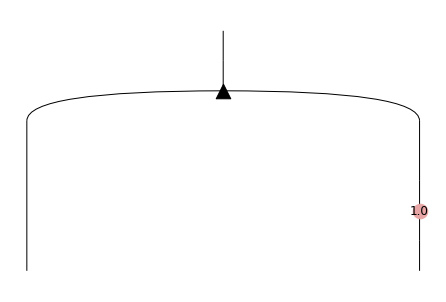

(array([[0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]),
 array([[0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j],
        [1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j]]),
 array([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j],
        [0.+0.j, 0.+0.j],
        [1.+0.j, 0.+0.j]]),
 array([[0.+0.j, 0.+0.j],
        [1.+0.j, 0.+0.j],
        [1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]))

In [9]:
a = W() >> X(1, 1, 1) @ Id(1)
b = W() >> Id(1) @ X(1, 1, 1)
c = W() >> X(1, 1, 1) @ X(1, 1, 1)
d = X(1, 1, 1) >> W() >> X(1, 1, 1) @ X(1, 1, 1)
a.draw(), b.draw()
eval(a), eval(b), eval(c), eval(d)

In [19]:
for _ in range(10):
    x = round(np.random.rand() * 2, 3)

    a = ZBox(1, 1, x) >> W()
    b = W() >> ZBox(1, 1, x) @ ZBox(1, 1, x)
    assert eq(a, b)
a.draw(), b.draw()

AssertionError: 

In [11]:
eval(a), eval(b)

(array([[1.   +0.j, 0.   +0.j],
        [0.   +0.j, 1.   +0.j],
        [0.   +0.j, 0.714+0.j],
        [0.   +0.j, 0.   +0.j]]),
 array([[1.    +0.j, 0.    +0.j],
        [0.    +0.j, 0.5098+0.j],
        [0.    +0.j, 0.714 +0.j],
        [0.    +0.j, 0.    +0.j]]))

In [12]:
eval(Swap >> Swap)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [13]:
eval(Swap) @ eval(W())

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.]])

In [14]:
eq(W(), W() >> Swap)
eval(W() >> Swap)

array([[1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [15]:
eval(Z(1, 1, pi) @ Z(1, 1, pi)).astype(float)

<ipython-input-15-445ef2de48a5>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(Z(1, 1, pi) @ Z(1, 1, pi)).astype(float)


array([[ 1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [16]:
eq(W() >> Z(1,1,pi) @ Id(1), Z(1, 1, pi) >> W() >> Id(1) @ Z(1, 1, pi))

True

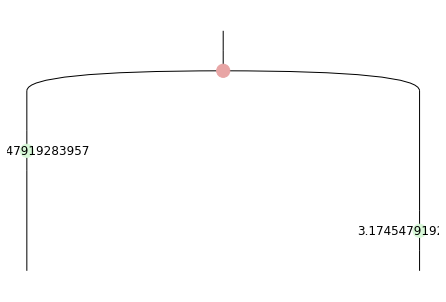

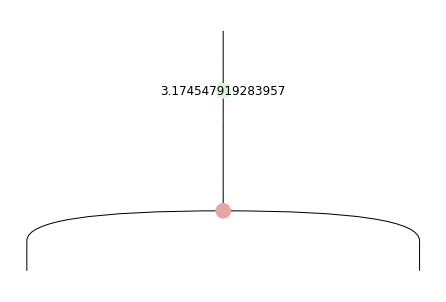

(array([[ 1.     +0.j     ,  0.     +0.j     ],
        [ 0.     +0.j     ,  0.99783+0.06586j],
        [ 0.     +0.j     , -0.99946-0.03295j],
        [-0.99946-0.03295j,  0.     +0.j     ]]),
 array([[ 1.     +0.j     ,  0.     +0.j     ],
        [ 0.     +0.j     ,  1.     +0.j     ],
        [ 0.     +0.j     , -0.99946-0.03295j],
        [-0.99946-0.03295j,  0.     +0.j     ]]))

In [17]:
for _ in range(10):
    x = np.random.rand() * 2 * pi

    a = X(1, 2) >> Z(1, 1, x) @ Z(1, 1, x)
    b = Z(1, 1, x) >> X(1,2)
    #assert eq(a, b)
a.draw(), b.draw()
eval(a), eval(b)

In [18]:
for _ in range(10):
    x = np.random.rand() * 2 * pi

    a = W() >> Z(1, 1, x) @ Id(1)
    b = Z(1, 1, x) >> W() >> Id(1) @ Z(1, 1, -x)
    assert eq(a, b)
a.draw(), b.draw()

AssertionError: 

In [ ]:
eval(H >> W() )

In [ ]:
for base in [X, Z]:
    for phase in [0, 1]:
        d = W() >> base(1, 0, phase) @ Id(1)
        d.draw()
        print(eval(d))

In [ ]:
eval(X(1, 0, 1))

In [ ]:
0.2 in (0, 0.5)

In [ ]:
a = X(0, 1, 1) @ Id(1) >> W(3) @ Id(1) >> Id(2) @ X(2, 0, 1)
a.draw()
eq(a, W())

In [ ]:
eval(Z(0, 1) >> W()), eval(Z(0, 1, pi) >> W())

In [ ]:
a = W() >> X(1, 1, 1) @ Id(1)
a.draw()
eval(a)

In [ ]:
#0 -> 10, 1 -> 00 + 11
b = X(1, 1, 1) >> W() >> Id(1) @ X(1,1,1)
eval(b)